In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
    get_color,
    replace_column_content,
    make_vertical_grouped_chart,
    make_horizontal_grouped_chart,
    make_grouped_pie_chart,
    get_percentage,
make_normalized_df,
    get_uniques_col_count  
)


%matplotlib inline

In [2]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [4]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
# shape of the dataset.
df.shape

(342, 25)

In [6]:
df.head()

,marca_temp,modalidad,trabajo,tipo_de_trabajo,devops,programar_x_trabajo,exp_en_IT,exp_en_programacion,1_linea_de_codigo,educacion,...,prog_script_leng,lib_frameworks,otras_lib_frameworks,db,plataformas,leng_fav,leng_mas_odiado,fram_fav,fram_mas_odiado,herramientas
0,2021/03/01 5:56:11 p. m. GMT-3,Remoto,Nacional (Paraguay),QA o testing,Educador,No,<5,NaN,22-23,Ed. Universitaria,...,JavaScript;Java;C++;SQL,NaN,NaN,MySQL;PostgreSQL;IBM DB2,GNU/Linux;Microsoft Windows;MacOS,SQL,NaN,NaN,NaN,GitHub;Slack;Jira;Microsoft Team;Discord
1,2021/03/01 5:57:32 p. m. GMT-3,Hibrído,Nacional (Paraguay),Dev full-stack;Aps para Esc. o Emp.;Project Lead,Sys Admin;Educador,Sí,15-19,15-19,20-21,Ed. Universitaria;Autodidacta,...,JavaScript;C#;HTML/CSS;SQL,ASP.NET;ASP.NET Core,.NET;Xamarin,MySQL;Microsoft SQL Server,GNU/Linux;Microsoft Windows;Microsoft Azure;Wo...,C#,Java,ASP.NET Core,Laravel,GitHub;Microsoft Team;Microsoft Azure
2,2021/03/01 5:57:57 p. m. GMT-3,Hibrído,Nacional (Paraguay),Dev front-end,NaN,Sí,<5,<5,20-21,Ed. Universitaria,...,JavaScript;TypeScript;PHP;C;C#;HTML/CSS;SQL,React.js;Angular;JQuery;ASP.NET Core,Opció.NET Coren 3,NaN,GNU/Linux;Microsoft Windows;MacOS,C#,Genexus,ASP.NET Core,Django,GitHub;Slack;GitLab;Google Suite;Microsoft Tea...
3,2021/03/01 5:59:04 p. m. GMT-3,Hibrído,Ambas,Dev full-stack,Sys Admin,Sí,5-9,5-9,10-11,Ed. Universitaria;Master;Autodidacta,...,JavaScript;TypeScript;PHP;HTML/CSS;SQL;Dart,Angular;Angular.js;JQuery;Laravel,Flutter,MySQL;MariaDB;PostgreSQL;Microsoft SQL Server;...,GNU/Linux;Microsoft Windows;MacOS;Android;iOS,PHP,NaN,Laravel,NaN,GitHub;Slack;Trello
4,2021/03/01 5:59:44 p. m. GMT-3,Remoto,Nacional (Paraguay),Dev mobile,NaN,Sí,5-9,5-9,16-17,Ed. Basica;Ed. Secundaria;Autodidacta,...,PHP;Java;Kotlin;Swift,Laravel,NaN,MySQL,Microsoft Windows;MacOS,Kotlin,C++,Laravel,NaN,GitHub;Slack;Confluence;Trello;Discord


In [7]:
for i in df.columns:print (i)

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas


# Education
---

    - About the "education level" of the people who answered the survey.

## General Education
---
    - column name : 'educacion'
    General aspects of the "education level" of the people who completed the survey.

In [8]:
ed_levels = get_column_uniques(df, "educacion")
ed_levels

['Ed. Secundaria',
 'Ed. Universitaria',
 'Master',
 'Doctorado',
 'Autodidacta',
 'Ed. Basica']

### Unique 'education levels'.
* 'Master'
* 'Ed. Universitaria'
* 'Doctorado'
* 'Ed. Secundaria'
* 'Autodidacta'
* 'Ed. Basica'

In [9]:
# Replacing education column content to english translation.

ed_repl = {
    'Ed. Basica': 'Basic Education',
    'Ed. Universitaria':'University Education',
    'Autodidacta':'Autodidact',
    'Doctorado':'Doctorate',
    'Ed. Secundaria':'Middle School'
}


replace_column_content(df,'educacion',ed_repl)

In [10]:
df['educacion'].value_counts().keys()

Index(['University Education',
       'Basic Education;Middle School;University Education',
       'Basic Education;Middle School;University Education;Autodidact',
       'University Education;Autodidact', 'Master', 'Middle School',
       'Basic Education;Middle School',
       'Basic Education;Middle School;Autodidact',
       'University Education;Master', 'Middle School;Autodidact',
       'Basic Education;Middle School;University Education;Master',
       'University Education;Master;Autodidact', 'Autodidact',
       'Basic Education;Middle School;University Education;Master;Autodidact',
       'Master;Autodidact', 'Middle School;University Education;Master',
       'Middle School;University Education',
       'Middle School;University Education;Autodidact',
       'Basic Education;Middle School;University Education;Master;Doctorate;Autodidact',
       'Basic Education;Middle School;Master;Autodidact', 'Doctorate'],
      dtype='object', name='educacion')

## Education levels counts.
---

In [11]:
get_uniques_col_count(df, 'educacion')

{'University Education': 279,
 'Master': 38,
 'Middle School': 130,
 'Basic Education': 107,
 'Autodidact': 94,
 'Doctorate': 2}

## Carers or Specialties
---

    We explore the 'carers or specialties' of the people who answered the survey.
    - column name : 'carr_especialidades'

In [12]:
get_column_uniques(df, 'carr_especialidades')

['Programación',
 'Diseño Gráfico',
 'Otras Ing.',
 'Análisis de Sist.',
 'Ninguna',
 'Ing. Informática',
 'Otras',
 'Matemático',
 'Ing. Electrónica',
 'Ing. Civil']

In [13]:
carr_repl = {
'Matemático': 'Mathematician',
'Ninguna':'None',
'Otras':'Others',
'Ing. Informática':'Eng. Computing',
'Diseño Gráfico':'Graphic design',
'Otras Ing.':'Other Eng.',
'Ing. Electrónica':'Eng. Electronics',
'Ing. Civil':'Eng. Civil',
'Análisis de Sist.':'System Analysis',
'Programación':'Programming',
}


replace_column_content(df,'carr_especialidades',carr_repl)

In [14]:
get_uniques_col_count(df, 'carr_especialidades')

{'Graphic design': 13,
 'System Analysis': 151,
 'None': 16,
 'Mathematician': 2,
 'Eng. Civil': 1,
 'Others Ing.': 6,
 'Others': 32,
 'Programming': 111,
 'Eng. Electronics': 8,
 'Eng. Computing': 169}

         categorias  conteo
0    Graphic design      13
1   System Analysis     151
2              None      16
3     Mathematician       2
4        Eng. Civil       1
5       Others Ing.       6
6            Others      32
7       Programming     111
8  Eng. Electronics       8
9    Eng. Computing     169







<Figure size 900x500 with 0 Axes>

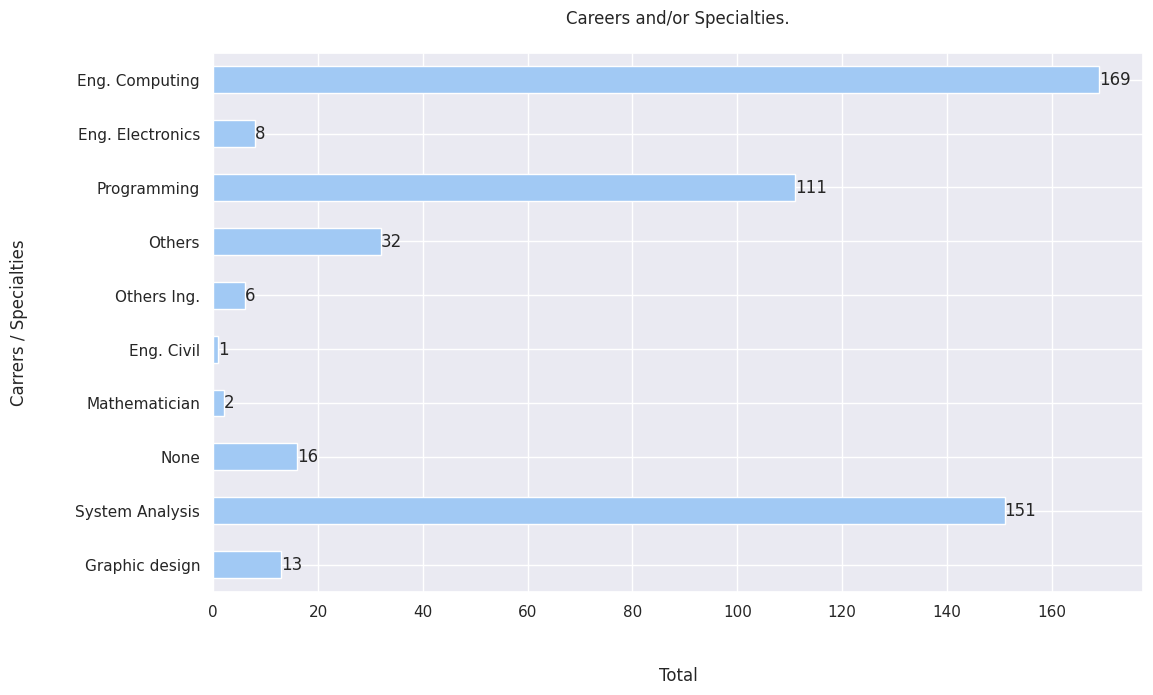

In [15]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
carr_esp_df = make_df(df, "carr_especialidades", "categorias", "conteo")

print(carr_esp_df)
print("\n" * 4)


carr_esp_plot = carr_esp_df.plot(
    kind="barh",
    title="Careers and/or Specialties.\n",
    legend=False,
    #color=get_color("fasfasddf", "light"),
)

carr_esp_uniques = get_column_uniques(df, "carr_especialidades")


carr_esp_plot.set_yticks([k for k, v in enumerate(carr_esp_uniques)], minor=False)
carr_esp_plot.set_yticklabels(
    [i for i in carr_esp_uniques],
    fontdict=None,
    minor=False,
)


carr_esp_plot.set_xlabel("\n\nTotal")
carr_esp_plot.set_ylabel("Carrers / Specialties\n\n")


cat_values = [i for i in carr_esp_df.conteo.value_counts().keys()]


# Plot annotations.
for k, v in enumerate(cat_values):
    carr_esp_plot.annotate(v, (v, k), va="center")

    # nv_ed_plot.annotate(v, (v,k),va='center')

plt.show()

In [16]:
carr_esp_uniques = get_column_uniques(df, "carr_especialidades")

In [17]:
carr_esp_uniques
print(len(carr_esp_uniques))

10


## Importance of Formal Education
---
    We explore the views of the "importance of formal education" of the people who answered.
    - column name : 'imp_ed_formal'

In [18]:
get_column_uniques(df, 'imp_ed_formal')

['MUY', '+ || -', 'NO', 'CRITICO', 'BASTANTE']

In [19]:
importance_repl = {
'MUY':'VERY',
'BASTANTE':'FAIRLY', 
'CRITICO':'CRITICAL',
#'+ || -':'MORE or LESS'
}


replace_column_content(df,'imp_ed_formal',importance_repl)

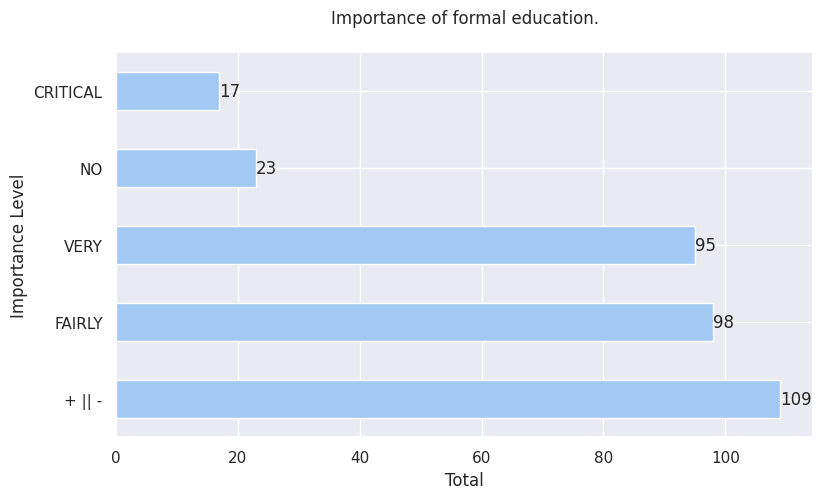

In [20]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts()
exp_plot = exp_df.plot(
    kind="barh",
    title=f"Importance of formal education.\n",
    #color=get_color("Mafasdfadle", "light"),
)


exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Importance Level")


# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_plot.annotate(v, (v, k), va="center")
plt.show()

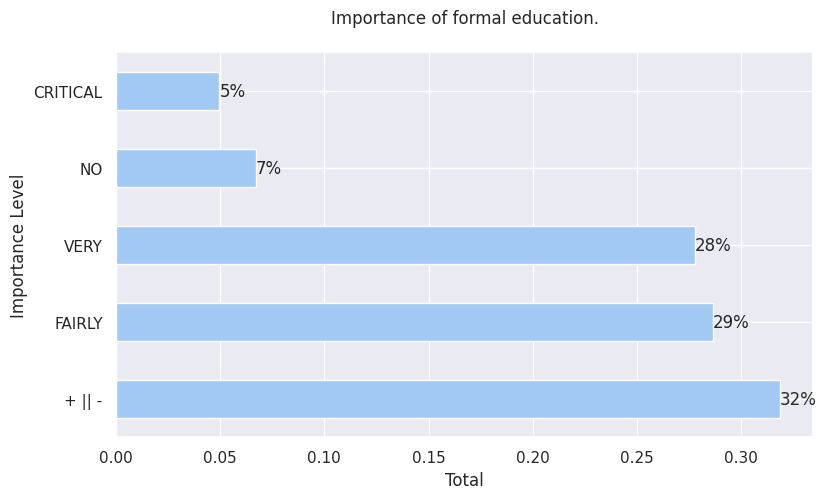

In [21]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts(normalize=True)
exp_plot = exp_df.plot(
    kind="barh",
    title=f"Importance of formal education.\n",
    #color=get_color("Mafasdfadle", "light"),
)


exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Importance Level")


# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts(normalize=True).values):
    exp_plot.annotate(get_percentage(v), (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [22]:
# Making groups by gender.
gen = df.groupby("genero")

In [23]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

In [24]:
gen_repl = {
    'HOMBRE':'MAN', 
    'MUJER':'WOMAN',
    'NO COMPARTO':'DONT SHARE',
}


replace_column_content(df,'genero',gen_repl)

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [25]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [26]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("MAN")["educacion"].value_counts()

educacion
University Education                                                              117
Basic Education;Middle School;University Education                                 37
Basic Education;Middle School;University Education;Autodidact                      31
University Education;Autodidact                                                    23
Master                                                                             15
Middle School                                                                      10
Basic Education;Middle School                                                       9
Basic Education;Middle School;Autodidact                                            8
Middle School;Autodidact                                                            7
University Education;Master                                                         6
Basic Education;Middle School;University Education;Master                           4
Basic Education;Middle School;University Edu

In [27]:
ed_uniques = get_column_uniques(df, "educacion")

             categories  count
0  University Education    226
1                Master     32
2         Middle School    113
3       Basic Education     93
4            Autodidact     78
5             Doctorate      2


<Figure size 900x500 with 0 Axes>

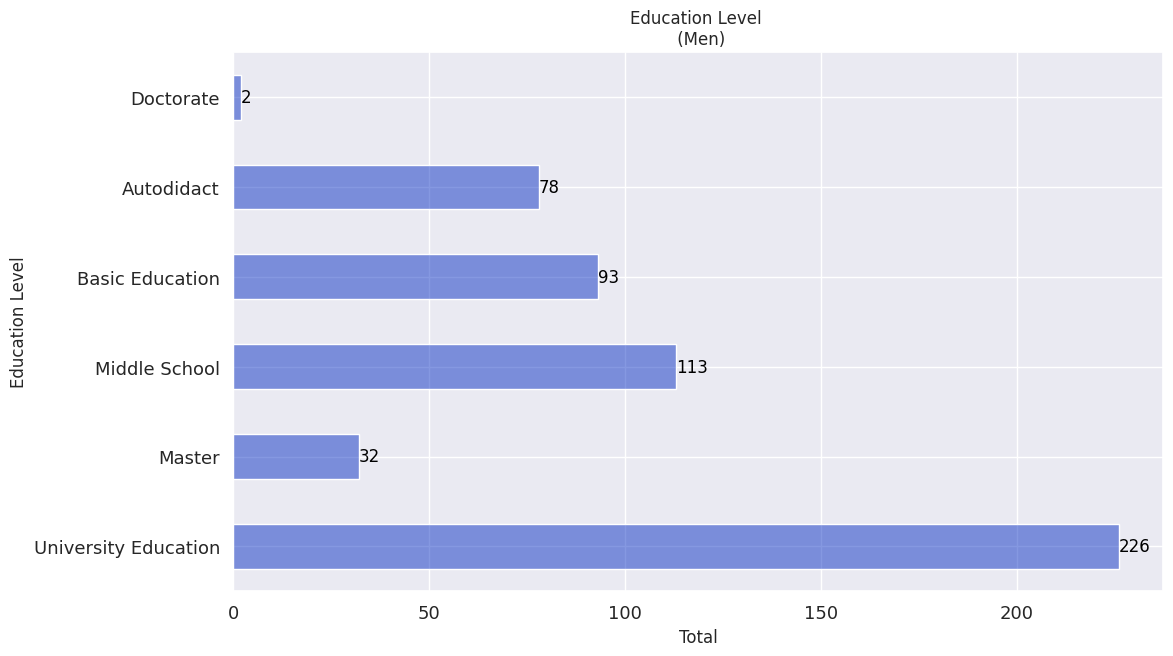

In [28]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("MAN"), "educacion", "categories", "count")
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Education Level \n (Men)",
    fontsize=13,
    legend=False,
    color=get_color("Male", "light"),
)

print(ed_hombres_df)
ed_hombres_plot.set_yticklabels([v for k, v in enumerate(ed_uniques)])


ed_hombres_plot.set_xlabel("Total")
ed_hombres_plot.set_ylabel("Education Level")


# Plot annotations.
for k, v in enumerate(ed_hombres_df["count"]):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [29]:
# Print 'value counts' of this column.
gen.get_group("MAN")["carr_especialidades"].value_counts()

carr_especialidades
Eng. Computing                                                      92
System Analysis                                                     52
Programming;System Analysis                                         22
Programming;Eng. Computing                                          17
Programming;System Analysis;Eng. Computing                          15
Programming                                                         15
None                                                                13
System Analysis;Eng. Computing                                       7
Eng. Electronics                                                     5
Programming;System Analysis;Others                                   5
Eng. Computing;Others                                                4
Others Ing.                                                          4
System Analysis;Others                                               3
Others                                                   

           Category  count
0    Graphic design     11
1   System Analysis    115
2              None     14
3     Mathematician      2
4       Others Ing.      5
5            Others     29
6       Programming     90
7  Eng. Electronics      7
8    Eng. Computing    143


<Figure size 900x500 with 0 Axes>

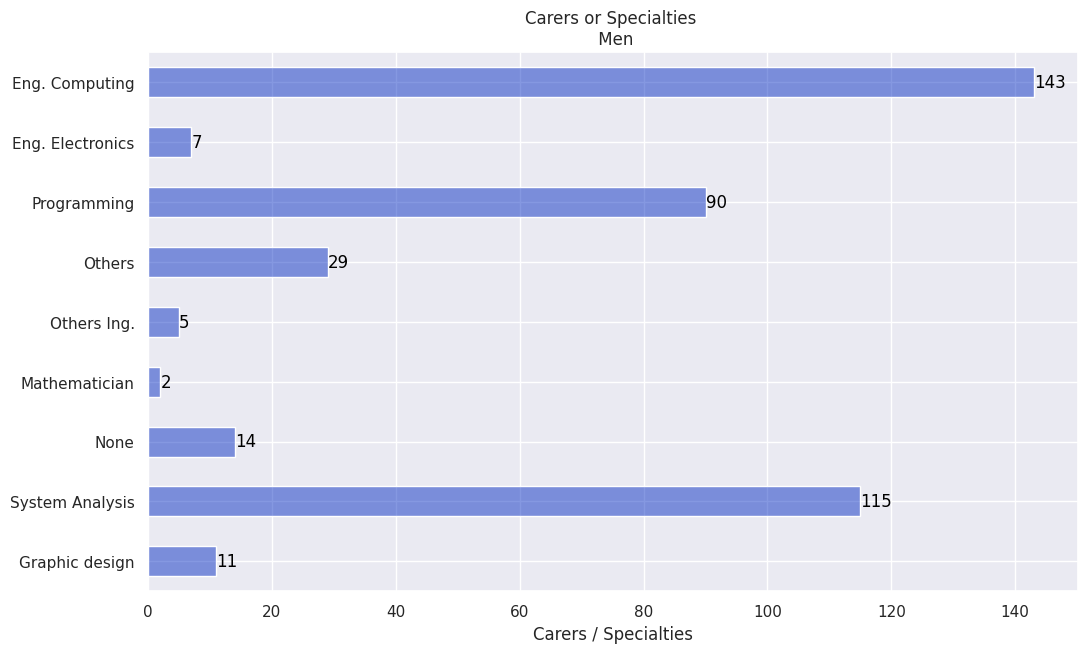

In [30]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(
    gen.get_group("MAN"), "carr_especialidades", "Category", "count"
)
carr_hombres_plot = carr_hombres_df.plot(
    kind="barh",
    title="Carers or Specialties \n Men",
    xlabel="Carers / Specialties",
    legend=False,
    color=get_color("Male", "light"),
)

print(carr_hombres_df)
carr_hombres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_hombres_df["Category"])]
)


# Plot annotations.
for k, v in enumerate(carr_hombres_df["count"]):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

In [31]:
carr_hombres_df = make_df(
    gen.get_group("MAN"), "carr_especialidades", "Category", "count"
)
print(carr_hombres_df)

           Category  count
0    Graphic design     11
1   System Analysis    115
2              None     14
3     Mathematician      2
4       Others Ing.      5
5            Others     29
6       Programming     90
7  Eng. Electronics      7
8    Eng. Computing    143


 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [32]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

imp_ed_formal
+ || -      109
FAIRLY       98
VERY         95
NO           23
CRITICAL     17
Name: count, dtype: int64

In [33]:
# Print the 'normal count' of values in the column.
print(df["imp_ed_formal"].value_counts(normalize=True))

imp_ed_formal
+ || -      0.318713
FAIRLY      0.286550
VERY        0.277778
NO          0.067251
CRITICAL    0.049708
Name: proportion, dtype: float64


In [34]:
make_normalized_df(df, 'imp_ed_formal')

,total count
categories,
+ || -,31.871345
FAIRLY,28.654971
VERY,27.777778
NO,6.725146
CRITICAL,4.970760


In [35]:
make_normalized_df(df, 'imp_ed_formal')

,total count
categories,
+ || -,31.871345
FAIRLY,28.654971
VERY,27.777778
NO,6.725146
CRITICAL,4.970760


In [36]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

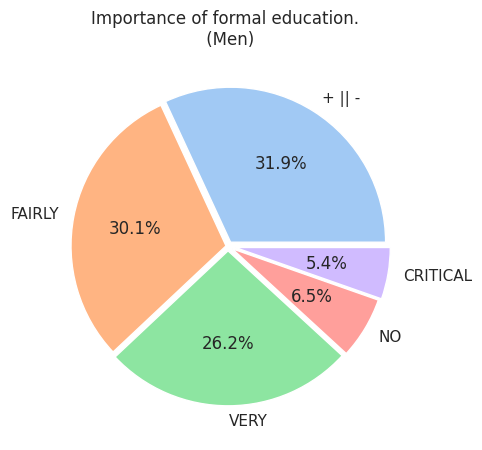

In [37]:
# Making a chart for this column.
fig = plt.figure(figsize=(5, 10))
ax1 = plt.subplot(111)
# Plot
import_df = gen.get_group("MAN")["imp_ed_formal"].value_counts(normalize=True)
import_plot = import_df.plot(
    kind="pie",
    title="Importance of formal education. \n (Men)",
    autopct="%1.1f%%",
    ylabel="",
    xlabel="",
    explode=explode_pie(import_df.size),
)

plt.show()

### EDUCACION - MUJERES
---
    The 'education' of the womens.

In [38]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [39]:
gen.get_group("WOMAN")["educacion"].value_counts()

educacion
University Education                                             29
University Education;Autodidact                                   5
Basic Education;Middle School;University Education                5
Basic Education;Middle School;University Education;Autodidact     3
University Education;Master                                       2
Master                                                            2
Master;Autodidact                                                 1
Basic Education;Middle School                                     1
Middle School                                                     1
Name: count, dtype: int64

             categories  count
0  University Education     44
1                Master      5
2         Middle School     10
3       Basic Education      9
4            Autodidact      9


<Figure size 900x500 with 0 Axes>

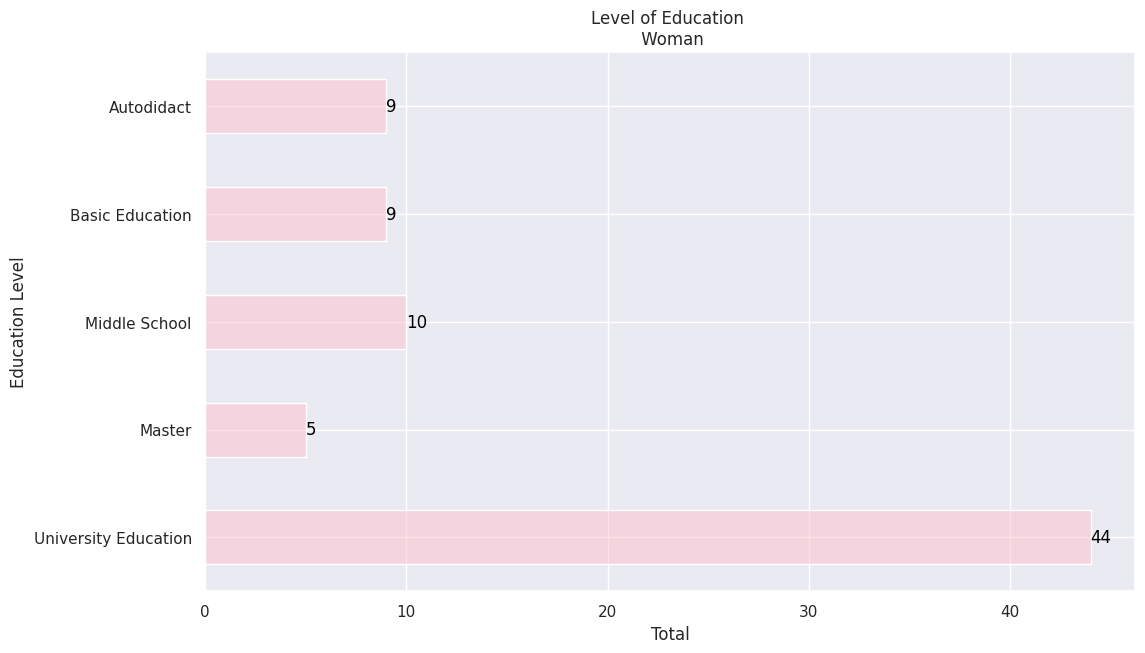

In [40]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("WOMAN"), "educacion", "categories", "count")
ed_mujeres_plot = ed_mujeres_df.plot(
    kind="barh",
    title="Level of Education \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)

print(ed_mujeres_df)
ed_mujeres_plot.set_yticklabels([v for k, v in enumerate(ed_mujeres_df["categories"])])

ed_mujeres_plot.set_xlabel("Total")
ed_mujeres_plot.set_ylabel("Education Level")


for k, v in enumerate([i for i in ed_mujeres_df["count"]]):
    if v < 10:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

        categories  count
0   Graphic design      1
1  System Analysis     27
2           Others      2
3      Programming     15
4   Eng. Computing     22


<Figure size 900x500 with 0 Axes>

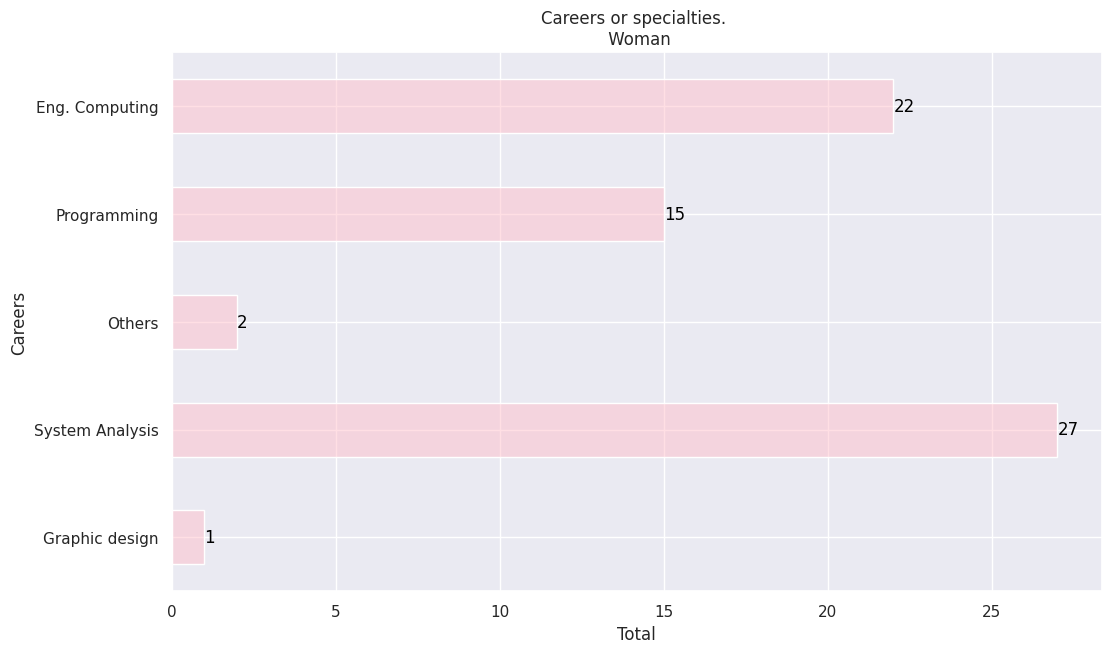

In [41]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(
    gen.get_group("WOMAN"), "carr_especialidades", "categories", "count"
)
carr_mujeres_plot = carr_mujeres_df.plot(
    kind="barh",
    ylabel="Carers / Specialties",
    title="Careers or specialties. \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)


carr_mujeres_plot.set_xlabel("Total")
carr_mujeres_plot.set_ylabel("Careers")




print(carr_mujeres_df)
carr_mujeres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_mujeres_df["categories"])]
)

for k, v in enumerate([i for i in carr_mujeres_df["count"]]):
    carr_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

In [42]:
[i for i in gen.groups.keys()]

['DONT SHARE', 'MAN', 'WOMAN']

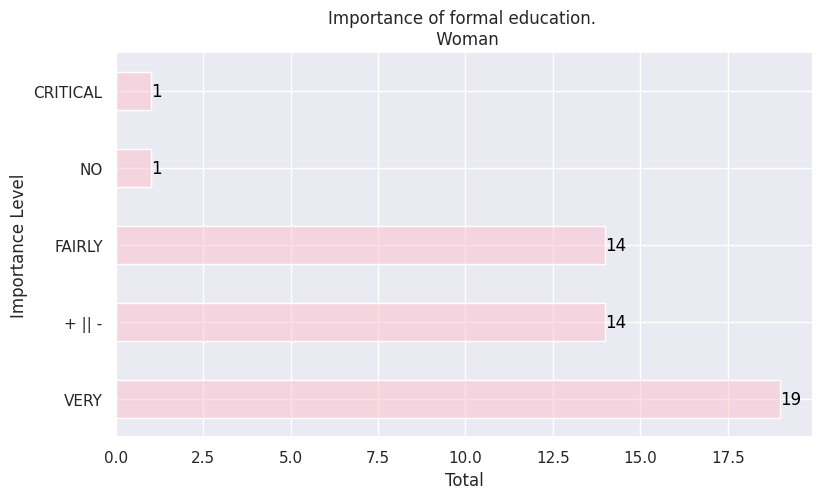

In [43]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = gen.get_group("WOMAN")["imp_ed_formal"].value_counts()
muj_import_plot = muj_import_df.plot(
        kind="barh",
        title="Importance of formal education. \n Woman",
        color=get_color("Female", "light"),
    )

muj_import_plot.set_xlabel("Total")
muj_import_plot.set_ylabel("Importance Level")



for k, v in enumerate(gen.get_group("WOMAN")["imp_ed_formal"].value_counts().values):
    muj_import_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### EDUCACION - NO COMPARTO

In [44]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [45]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

             categories  count
0  University Education      4
1       Basic Education      2
2            Autodidact      2
3         Middle School      3


<Figure size 900x500 with 0 Axes>

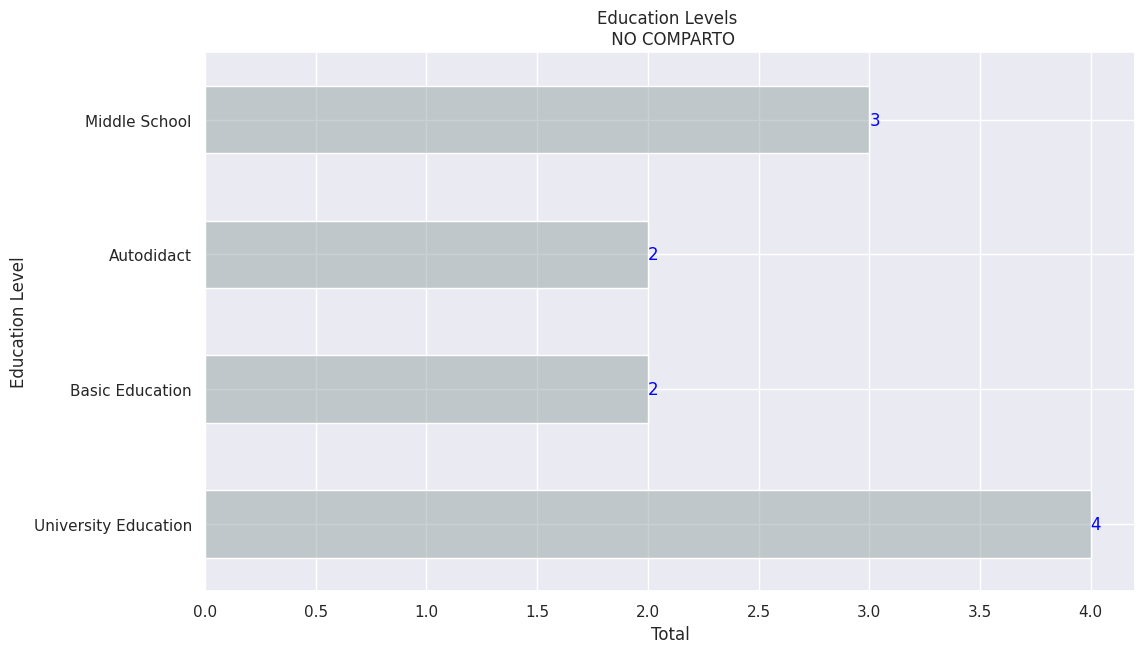

In [46]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(
    gen.get_group('DONT SHARE'), "educacion", "categories", "count"
)

ed_no_comp_plot = ed_no_comp_df.plot(
    kind="barh",
    title="Education Levels \n NO COMPARTO",
    color=get_color("I do not share.", "light"),
    legend=False,
)


ed_no_comp_plot.set_xlabel("Total")
ed_no_comp_plot.set_ylabel("Education Level")

print(ed_no_comp_df)
ed_no_comp_plot.set_yticklabels([v for k, v in enumerate(ed_no_comp_df["categories"])])


for k, v in enumerate([i for i in ed_no_comp_df["count"]]):
    ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

          categoria  cuenta
0    Graphic design       1
1   System Analysis       3
2              None       1
3        Eng. Civil       1
4       Others Ing.       1
5       Programming       2
6  Eng. Electronics       1
7    Eng. Computing       1


<Figure size 900x500 with 0 Axes>

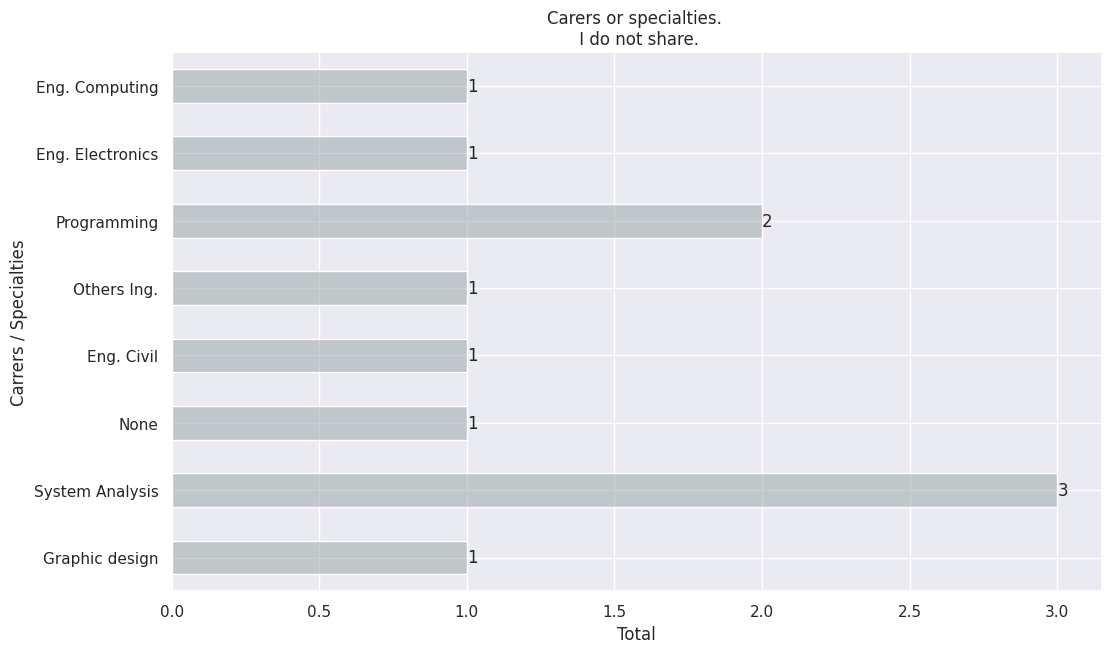

In [47]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(
    gen.get_group('DONT SHARE'), "carr_especialidades", "categoria", "cuenta"
)
carr_no_comp_plot = carr_no_comp_df.plot(
    kind="barh",
    title="Carers or specialties. \n I do not share.",
    color=get_color("I do not share.", "light"),
    legend=False,
)


carr_no_comp_plot.set_xlabel("Total")
carr_no_comp_plot.set_ylabel("Carrers / Specialties")


print(carr_no_comp_df)
carr_no_comp_plot.set_yticklabels(
    [v for k, v in enumerate(carr_no_comp_df["categoria"])]
)


for k, v in enumerate([i for i in carr_no_comp_df["cuenta"]]):
    carr_no_comp_plot.annotate(v, (v, k), va="center")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

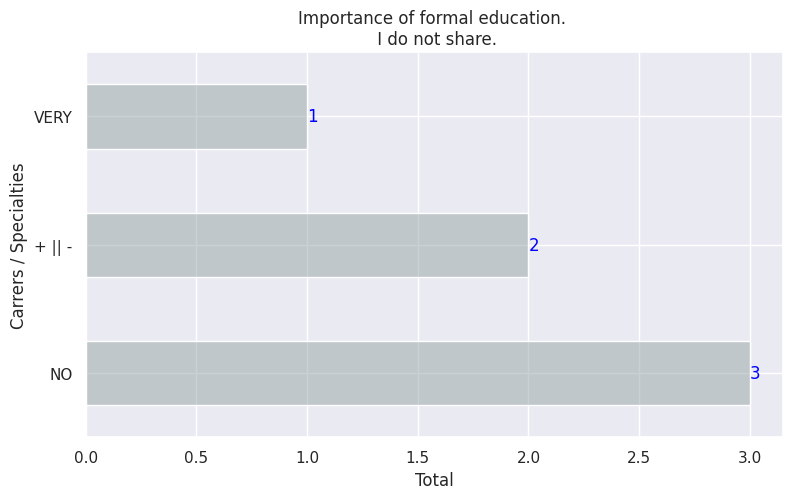

In [48]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp_df = gen.get_group('DONT SHARE')["imp_ed_formal"].value_counts()
imp_ed_no_comp_plot = imp_ed_no_comp_df.plot(
    kind="barh",
    title="Importance of formal education. \n I do not share.",
    color=get_color("I do not share.", "light"),
)


imp_ed_no_comp_plot.set_xlabel("Total")
imp_ed_no_comp_plot.set_ylabel("Carrers / Specialties")


for k, v in enumerate(
    [i for i in gen.get_group('DONT SHARE')["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [49]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

# IMPORTANCIA DE LA EDUCACION FORMAL - COMPARATIVAS

columna --------> 'imp_ed_formal'

In [50]:
generos = gen.groups.keys()
plt.figure(figsize=(4, 20), dpi=80)



<Figure size 320x1600 with 0 Axes>

<Figure size 320x1600 with 0 Axes>

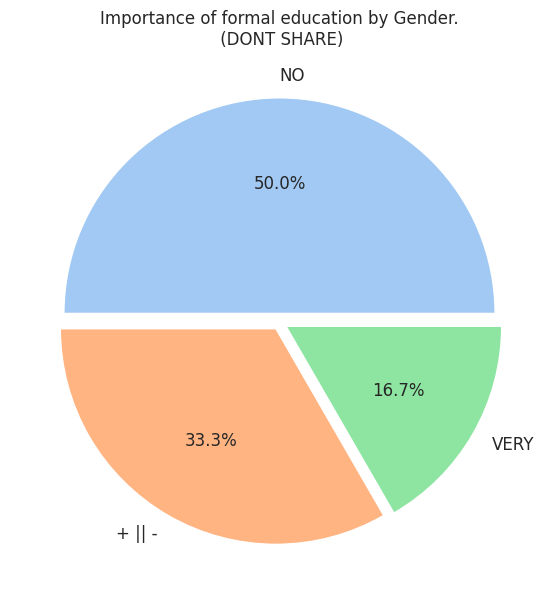

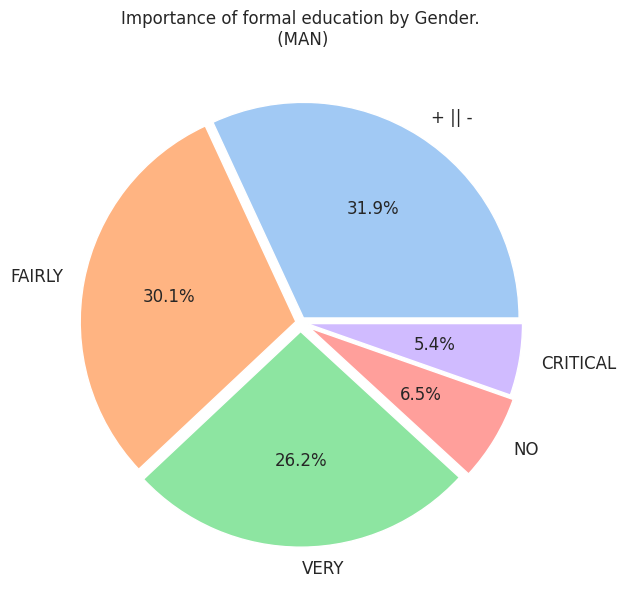

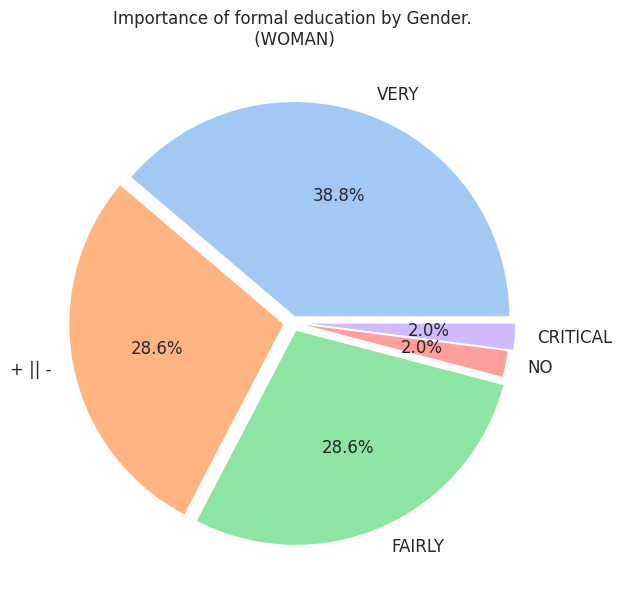

In [51]:

for k, v in enumerate(generos):
    # plt.subplot(2, 2, k + 1)
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    ie_plot = ie_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        explode=explode_pie(ie_df.size),
        textprops={"fontsize": 12},
        title=f"Importance of formal education by Gender.\n ({v})",
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.3, wspace=0.4, hspace=0.4)

In [52]:
for k, v in enumerate(generos):
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    print(f"Gender : {v}\nImportance of formal education.")
    print("=" * 33)
    print(percentage_to_normal(ie_df))
    print("\n" * 4)

Gender : DONT SHARE
Importance of formal education.
imp_ed_formal
NO        50.0 %
+ || -    33.3 %
VERY      16.7 %
Name: proportion, dtype: object





Gender : MAN
Importance of formal education.
imp_ed_formal
+ || -      31.9 %
FAIRLY      30.1 %
VERY        26.2 %
NO           6.5 %
CRITICAL     5.4 %
Name: proportion, dtype: object





Gender : WOMAN
Importance of formal education.
imp_ed_formal
VERY        38.8 %
+ || -      28.6 %
FAIRLY      28.6 %
NO           2.0 %
CRITICAL     2.0 %
Name: proportion, dtype: object







## Education 
    (Column name 'educacion'.)

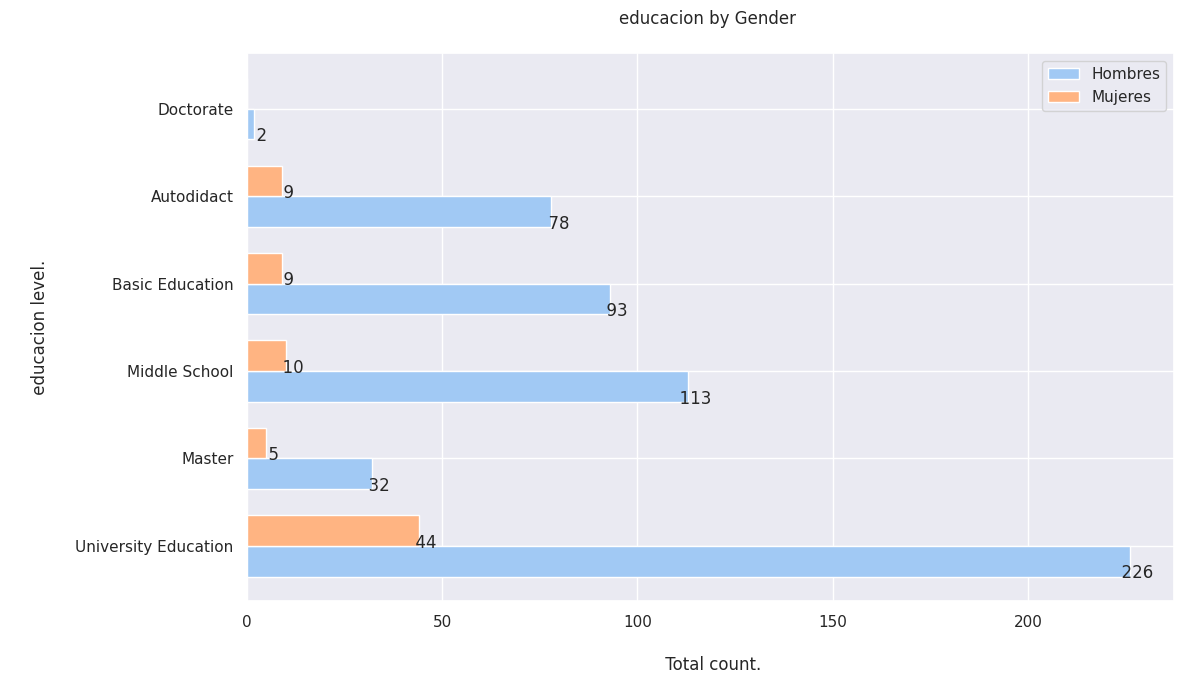

In [53]:
group_config={
    'title':'educacion by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n educacion level. \n',
    'ylabel':'\n Total count.',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "educacion",
                    get_column_uniques(df,'educacion'),
                    group_config
                    )

## Carreras o especialidades.
   - Column name 'carr_especialidades'.

# carr_especialidades

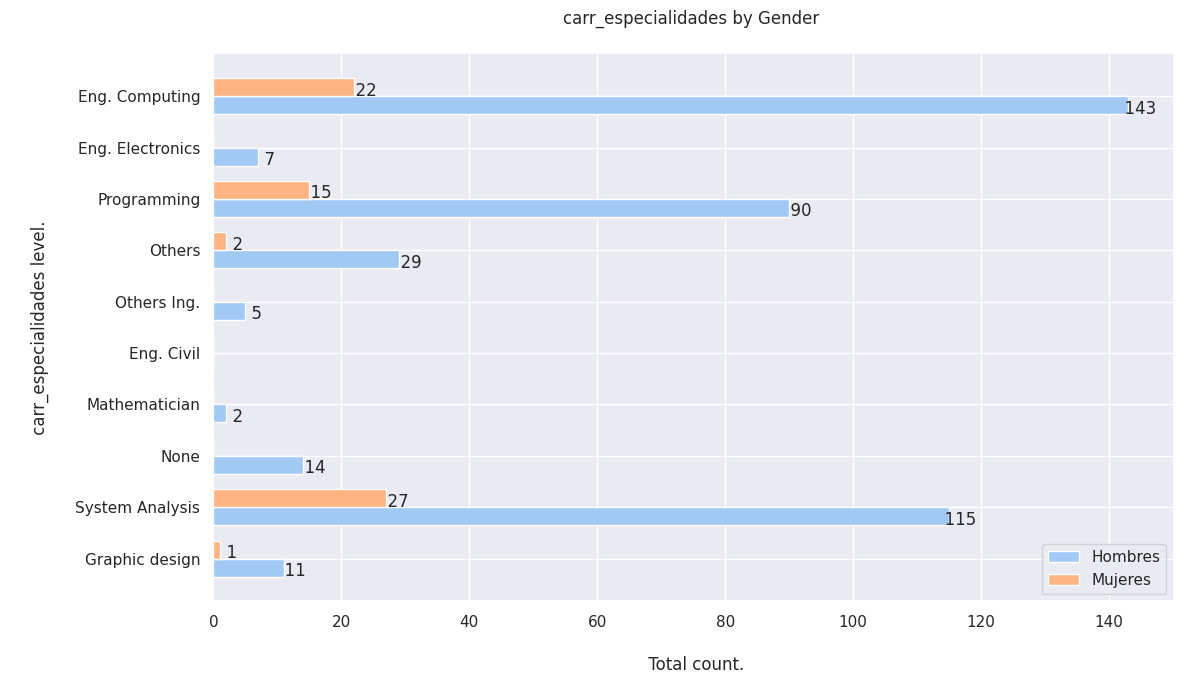

In [54]:
group_config={
    'title':'carr_especialidades by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n carr_especialidades level. \n',
    'ylabel':'\n Total count.',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "carr_especialidades",
                    get_column_uniques(df,'carr_especialidades'),
                    group_config
                    )

# edad_actual

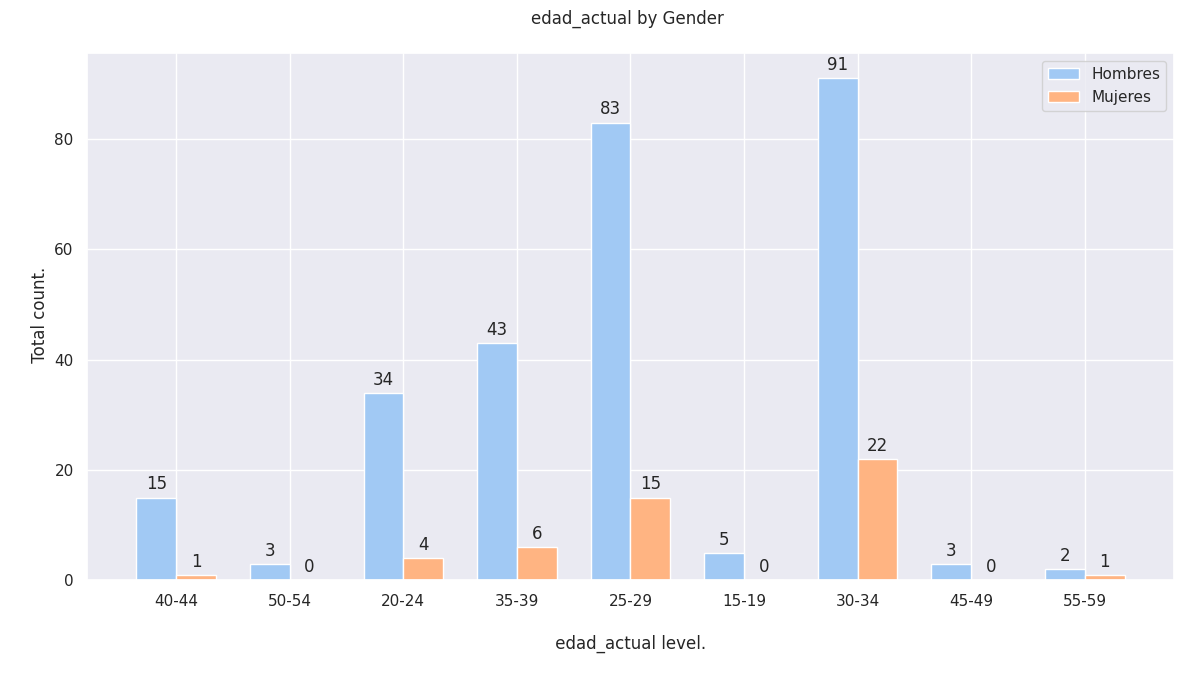

In [55]:
group_config={
    'title':'edad_actual by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n edad_actual level. \n',
    'ylabel':'\n Total count.',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "edad_actual",
                    get_column_uniques(df,'edad_actual'),
                    group_config
                    )

In [56]:
print('HOMBRES ', gen.get_group('MAN').fillna('')['edad_actual'].value_counts())
print('\n'*3)
print('MUJERES ', gen.get_group('WOMAN').fillna('')['edad_actual'].value_counts())

HOMBRES  edad_actual
30-34    91
25-29    83
35-39    43
20-24    34
40-44    15
15-19     5
45-49     3
50-54     3
55-59     2
Name: count, dtype: int64




MUJERES  edad_actual
30-34    22
25-29    15
35-39     6
20-24     4
55-59     1
40-44     1
Name: count, dtype: int64


# salario_mensual


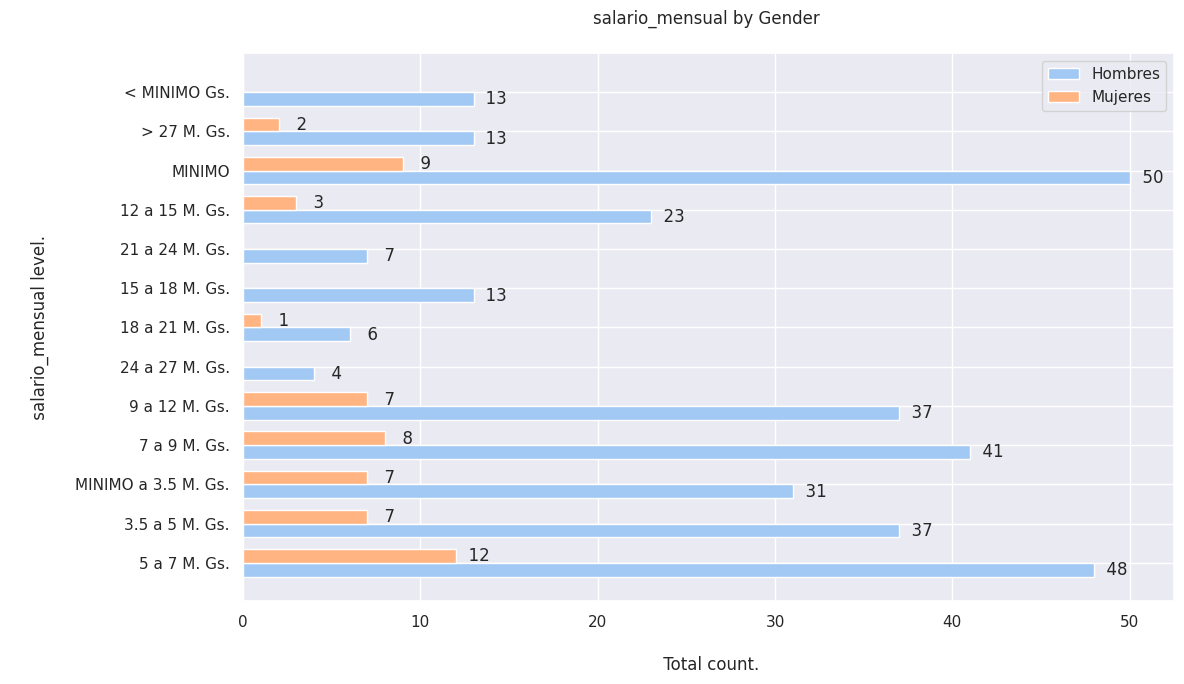

In [57]:
group_config={
    'title':'salario_mensual by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n salario_mensual level. \n',
    'ylabel':'\n Total count.',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "salario_mensual",
                    get_column_uniques(df,'salario_mensual'),
                    group_config
                    )

# TEST COMPARATIVE CHARTS

In [58]:
for i in df.columns: print(i)

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas


In [59]:
get_column_uniques(df, "trabajo")

['Nacional (Paraguay)', 'Internacional', 'Ambas']

In [60]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

In [61]:
count_modalidad_hombres = get_uniques_col_count(gen.get_group('MAN'),'modalidad')

In [62]:
count_modalidad_mujeres = get_uniques_col_count(gen.get_group('WOMAN'),'modalidad')

In [63]:
modalidad_labels = get_column_uniques(df,'modalidad')

In [64]:
print('MODALIDAD LABELS -> ', modalidad_labels)
print('MOD COUNT HOMBRES -< ', count_modalidad_hombres)
print('MOD COUNT MUJERES -< ', count_modalidad_mujeres)

MODALIDAD LABELS ->  ['Ninguna', 'Hibrído', 'Remoto', 'Presencial']
MOD COUNT HOMBRES -<  {'Ninguna': 8, 'Hibrído': 94, 'Remoto': 117, 'Presencial': 60}
MOD COUNT MUJERES -<  {'Presencial': 18, 'Remoto': 20, 'Hibrído': 11}


In [65]:
men_val = [count_modalidad_hombres.get(i,0) for i in modalidad_labels ]

In [66]:
women_val = [count_modalidad_mujeres.get(i,0) for i in modalidad_labels ]

In [67]:
men_val

[8, 94, 117, 60]

In [68]:
women_val

[0, 11, 20, 18]

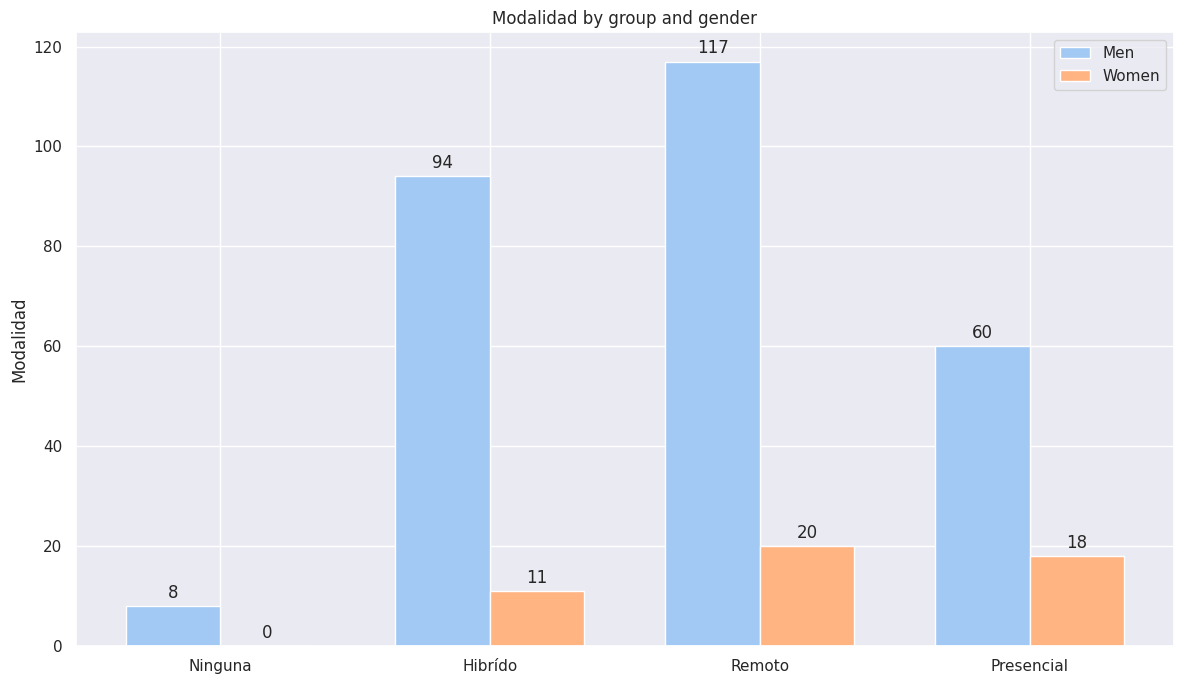

In [69]:

labels = get_column_uniques(df,'modalidad')
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_val, width, label='Men')
rects2 = ax.bar(x + width/2, women_val, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Modalidad')
ax.set_title('Modalidad by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

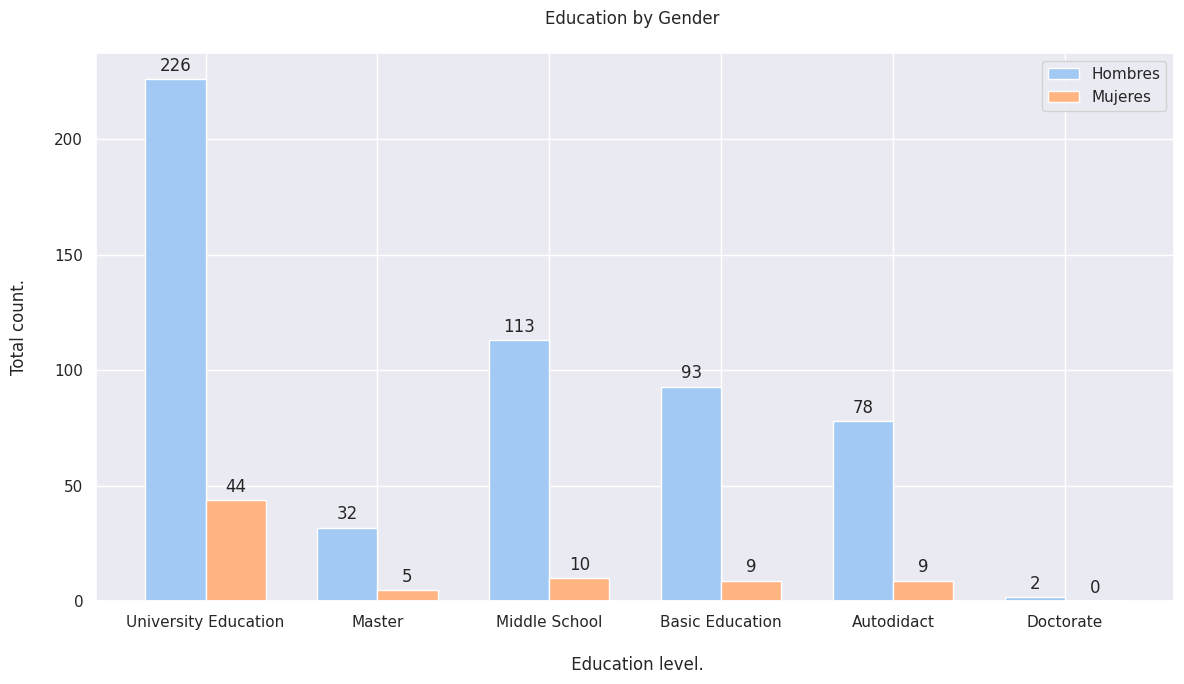

In [70]:
group_config={
    'title':'Education by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n Education level.',
    'ylabel':'Total count.\n',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN'),
                    gen.get_group('WOMAN'),
                    "educacion",
                    get_column_uniques(df,'educacion'),
                    group_config
                    )

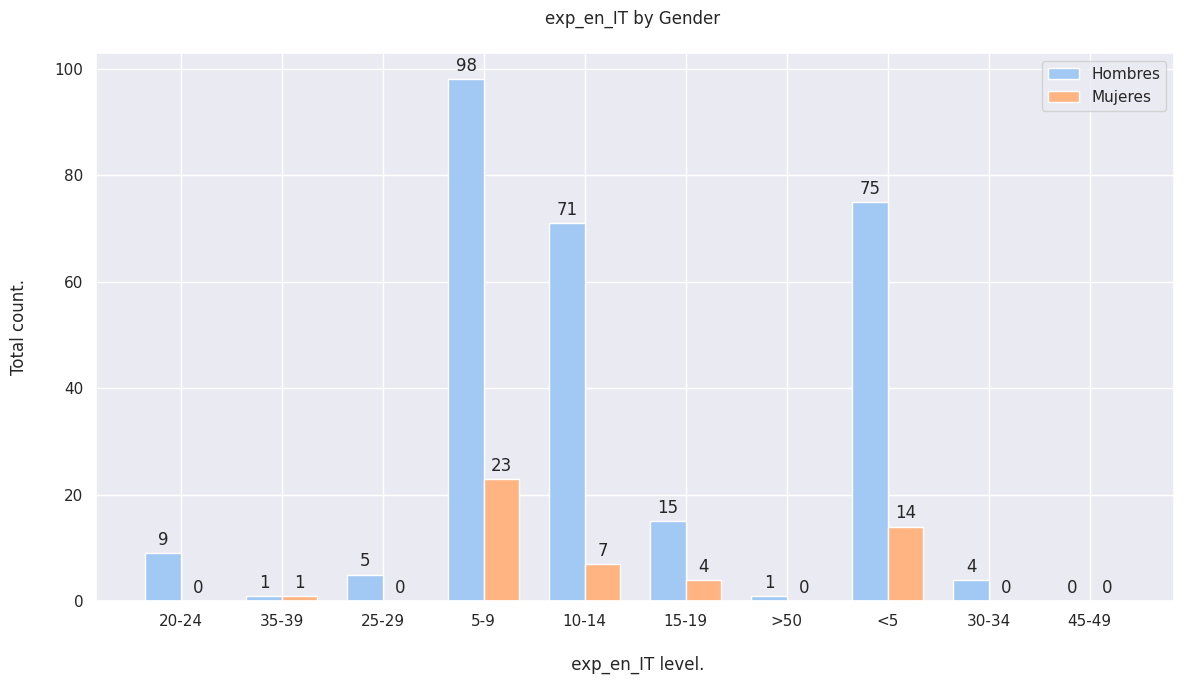

In [71]:
group_config={
    'title':'exp_en_IT by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n exp_en_IT level.',
    'ylabel':'Total count.\n',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN'),
                    gen.get_group('WOMAN'),
                    "exp_en_IT",
                    get_column_uniques(df,'exp_en_IT'),
                    group_config
                    )

In [72]:
df['leng_mas_odiado'].dropna(inplace=True)

In [73]:
 get_column_uniques(df,'1_linea_de_codigo')

['24-25',
 '14-15',
 '18-19',
 '10-11',
 '28-29',
 '22-23',
 '16-17',
 '>30',
 '26-27',
 '12-13',
 '<10',
 '20-21']

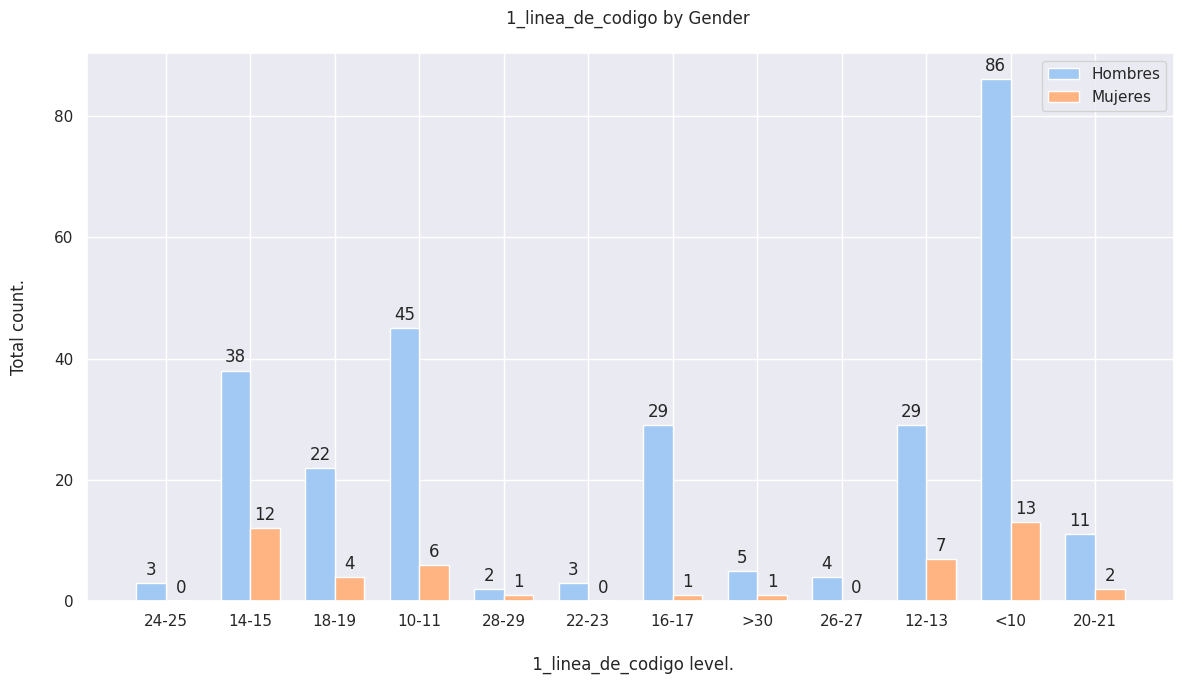

In [74]:
group_config={
    'title':'1_linea_de_codigo by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n 1_linea_de_codigo level.',
    'ylabel':'Total count.\n',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "1_linea_de_codigo",
                    get_column_uniques(df,'1_linea_de_codigo'),
                    group_config
                    )

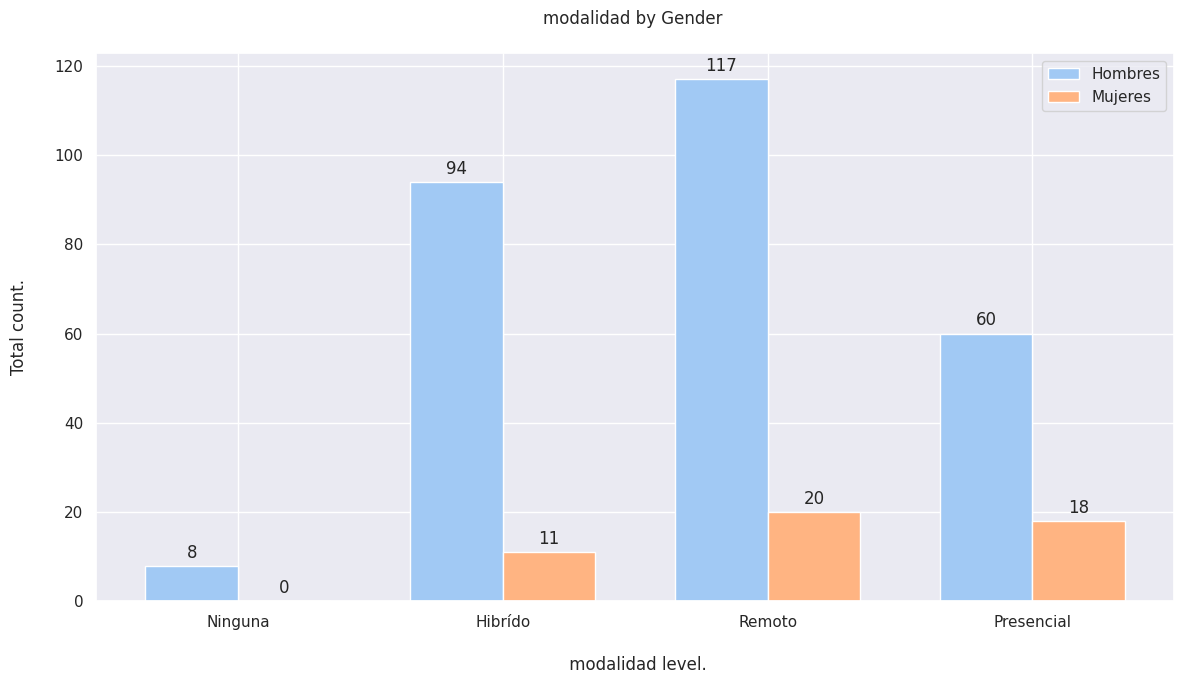

In [75]:
group_config={
    'title':'modalidad by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n modalidad level.',
    'ylabel':'Total count.\n',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "modalidad",
                    get_column_uniques(df,'modalidad'),
                    group_config
                    )

In [76]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

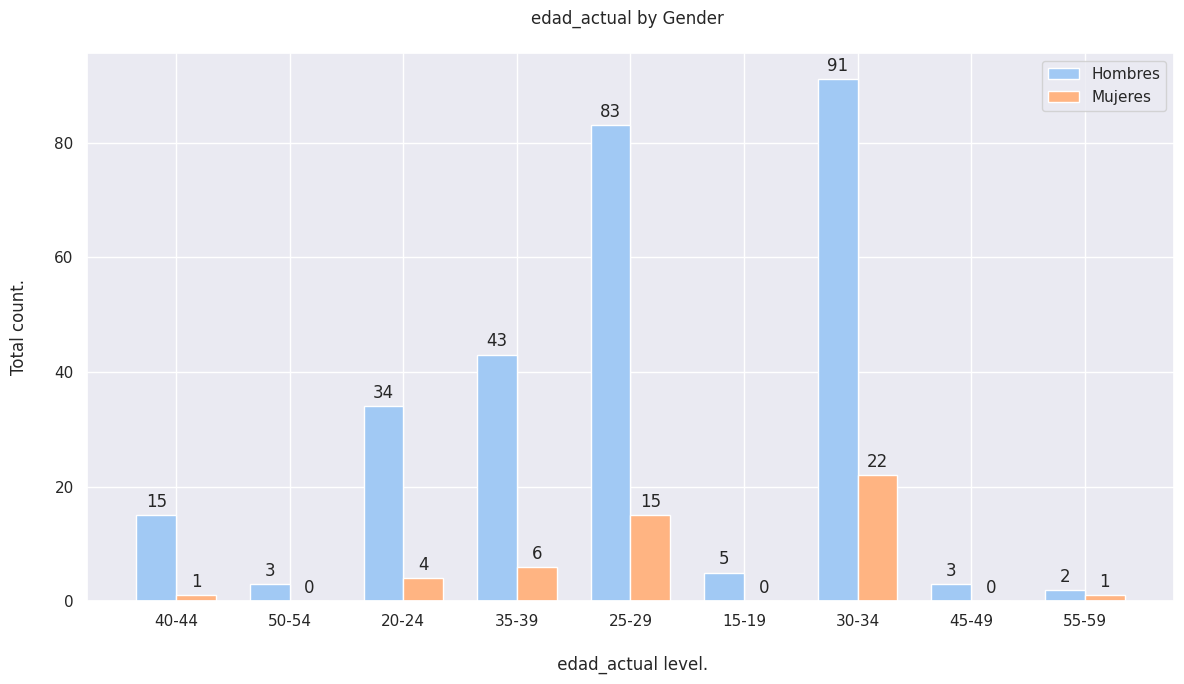

In [77]:
group_config={
    'title':'edad_actual by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n edad_actual level.',
    'ylabel':'Total count.\n',
}

make_vertical_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "edad_actual",
                    get_column_uniques(df,'edad_actual'),
                    group_config
                    )

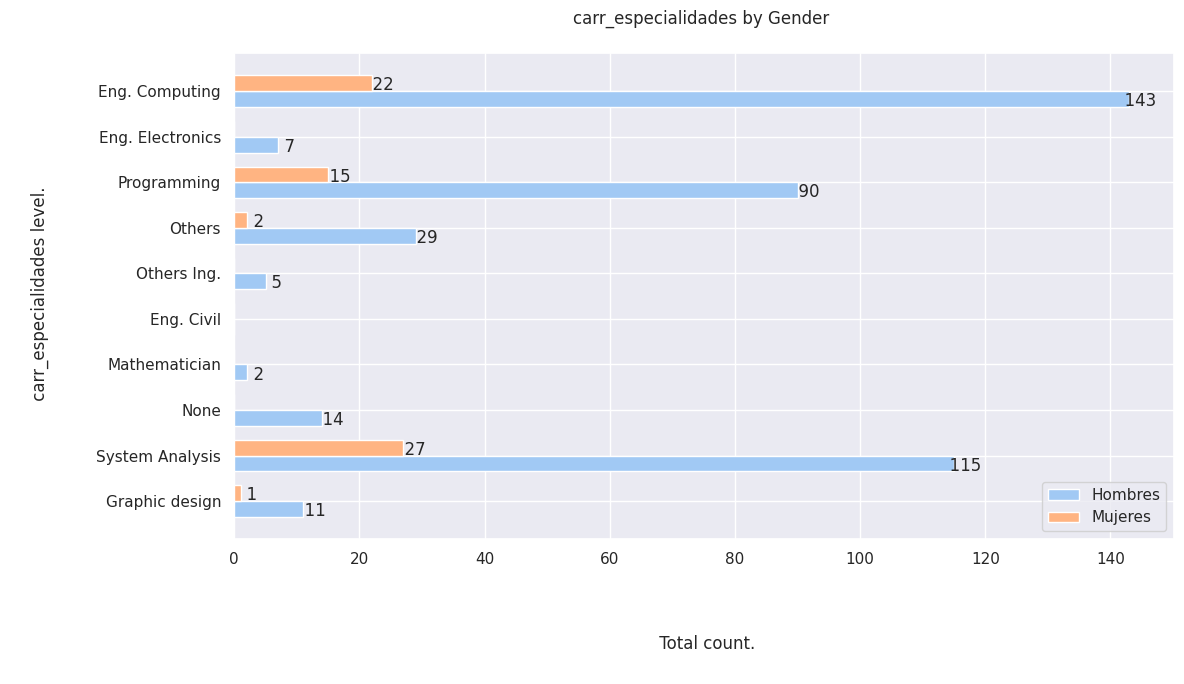

In [78]:
group_config={
    'title':'carr_especialidades by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n carr_especialidades level.\n \n',
    'ylabel':'\n \n \n Total count.\n',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "carr_especialidades",
                    get_column_uniques(df,'carr_especialidades'),
                    group_config
                    )

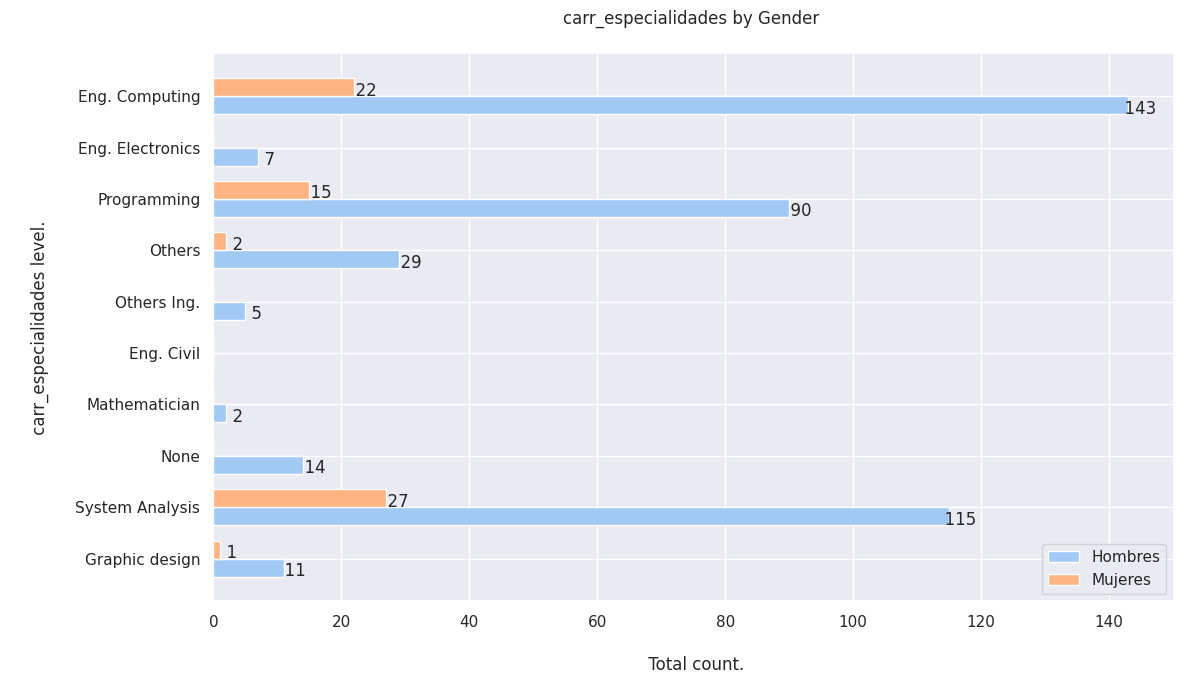

In [79]:
group_config={
    'title':'carr_especialidades by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n carr_especialidades level. \n',
    'ylabel':'\n Total count.',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "carr_especialidades",
                    get_column_uniques(df,'carr_especialidades'),
                    group_config
                    )

In [80]:
print("MAN ", get_uniques_col_count(gen.get_group('MAN').fillna(''),"carr_especialidades"))
print('\n'*3)
#print("WOMAN -> ", gen.get_group('WOMAN').fillna('')["carr_especialidades"].value_counts())

MAN  {'Graphic design': 11, 'System Analysis': 115, 'None': 14, 'Mathematician': 2, 'Others Ing.': 5, 'Others': 29, 'Programming': 90, 'Eng. Electronics': 7, 'Eng. Computing': 143}






In [81]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

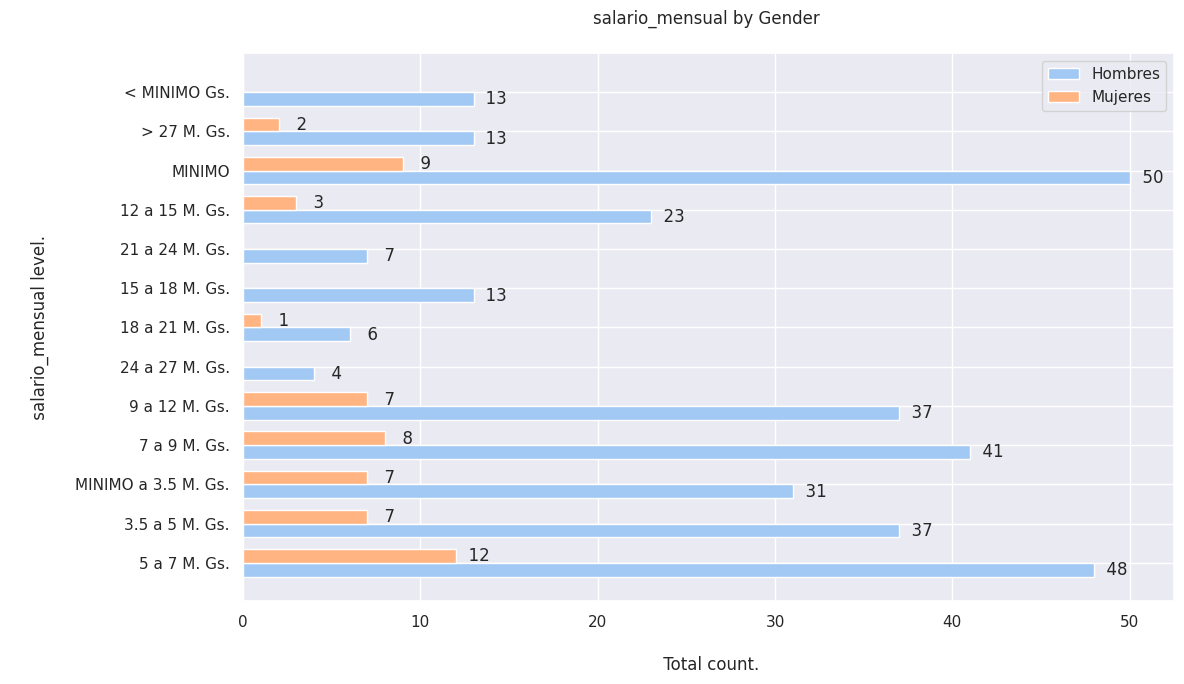

In [82]:
#salario_mensual
group_config={
    'title':'salario_mensual by Gender \n',
    'c1_label':'Hombres',
    'c2_label':'Mujeres',
    'xlabel':'\n salario_mensual level. \n',
    'ylabel':'\n Total count.',
}

make_horizontal_grouped_chart (df, 
                    gen.get_group('MAN').fillna(''),
                    gen.get_group('WOMAN').fillna(''),
                    "salario_mensual",
                    get_column_uniques(df,'salario_mensual'),
                    group_config
                    )


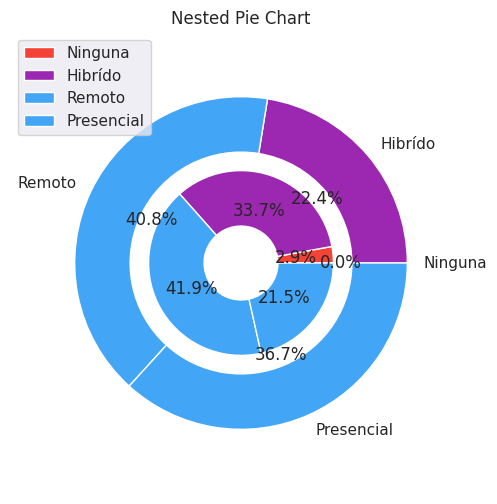

In [83]:
make_grouped_pie_chart(df,
                       gen.get_group('MAN').fillna(''),
                       gen.get_group('WOMAN').fillna(''),
                       'modalidad')